In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile
import geopandas as gpd
import urllib3

# Extracting data from [US Environmental Protection Agency](https://aqs.epa.gov/aqsweb/airdata/download_files.html)

The following code downloads every single `.zip` file from the Annual Summary Data table, specifically the AQI by County column. Then the `.csv` files are extracted and concatenated into a single pandas dataframe. The resulting dataframe, `final_df` is converted into `combined_aqi_by_county.csv` and saved to drive.

Getting the file from Drive is faster than doing this entire process everytime a new runtime connection has to be made.

(Last run: May 7th, 2025)

```
import os
import zipfile
import shutil

# Create directories for zipped and extracted data if they don't exist
os.makedirs('/content/zipped', exist_ok=True)
os.makedirs('/content/extracted_data', exist_ok=True)

# Download all ZIP files for 2024 to 1980 into the 'zipped' folder
base_url = 'https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_{}.zip'

for year in range(2024, 1979, -1):  # Download files from 2024 to 1980
    zip_file_name = os.path.join('/content/zipped', f'annual_aqi_by_county_{year}.zip')  # Save as annual_aqi_by_county_YEAR.zip
    download_url = base_url.format(year)
    print(f"Downloading {download_url}...")
    !wget -O {zip_file_name} {download_url}

# Unzip each downloaded file into 'extracted_data'
for zip_file in os.listdir('/content/zipped'):
    zip_file_path = os.path.join('/content/zipped', zip_file)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/extracted_data')

# Delete the 'zipped' folder and its contents after extraction
shutil.rmtree('/content/zipped')
shutil.rmtree('/content/sample_data')

# Verify extraction
!ls /content/extracted_data

# Initialize an empty list to hold individual DataFrames
df_list = []

# Read all CSV files from the extracted data and combine them into a single DataFrame
for file in os.listdir('/content/extracted_data'):
    if file.endswith('.csv'):  # Only process CSV files
        file_path = os.path.join('/content/extracted_data', file)
        print(f"Reading {file_path}...")
        df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
        df_list.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the combined DataFrame
final_df.head()

# Save the DataFrame to a CSV file
final_df.to_csv('/content/combined_aqi_by_county.csv', index=False)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path inside your Google Drive
output_path = '/content/drive/My Drive/Colab Notebooks/Datasets, spreadsheets, etc.'

# Create the folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Save the DataFrame to that path
final_df.to_csv(f'{output_path}/combined_aqi_by_county.csv', index=False)

## (Optional) Download the CSV file
# from google.colab import files
# files.download('/content/combined_aqi_by_county.csv')
```

# Getting the data

In [28]:
del aqi_df

In [29]:
# Easy simple way of accessing my datasets
if 'aqi_df' not in globals():
    aqi_df_sharelink = 'https://drive.google.com/file/d/130DVMpCfi1dujuygMyI8bzoP1fvSONvO/view?usp=drive_link' # this is the link received when clicked the Share button in Google Drive
    aqi_df = pd.read_csv('https://drive.google.com/uc?export=download&id='+aqi_df_sharelink.split('/d/')[1].split('/')[0]) # this parses the string from the line above to make a download link

aqi_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2001,283,174,95,12,2,0,0,159,84,46,0,0,203,80,0
1,Alabama,Clay,2001,279,145,119,14,1,0,0,164,87,49,0,0,197,82,0
2,Alabama,Colbert,2001,100,36,64,0,0,0,0,90,78,55,0,0,0,100,0
3,Alabama,DeKalb,2001,365,198,136,28,3,0,0,164,97,47,0,0,292,73,0
4,Alabama,Elmore,2001,241,165,63,12,1,0,0,154,80,43,0,0,241,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41531,Wyoming,Laramie,1988,54,53,1,0,0,0,0,52,26,16,0,0,0,0,54
41532,Wyoming,Park,1988,51,39,12,0,0,0,0,98,61,28,0,0,0,0,51
41533,Wyoming,Sheridan,1988,278,206,70,2,0,0,0,115,62,38,0,0,0,0,278
41534,Wyoming,Sublette,1988,70,70,0,0,0,0,0,43,32,15,0,0,0,70,0


In [59]:
list(aqi_df.columns)

['State',
 'County',
 'Year',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10']

In [55]:
print(aqi_df['State'].unique())

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Florida' 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [56]:
aqi_df = aqi_df[~aqi_df['State'].isin(['Canada', 'Country Of Mexico', 'Alaska', 'Hawaii', 'District Of Columbia', 'Puerto Rico', 'Virgin Islands', 'Guam'])].copy()

Text(0, 0.5, 'Frequency')

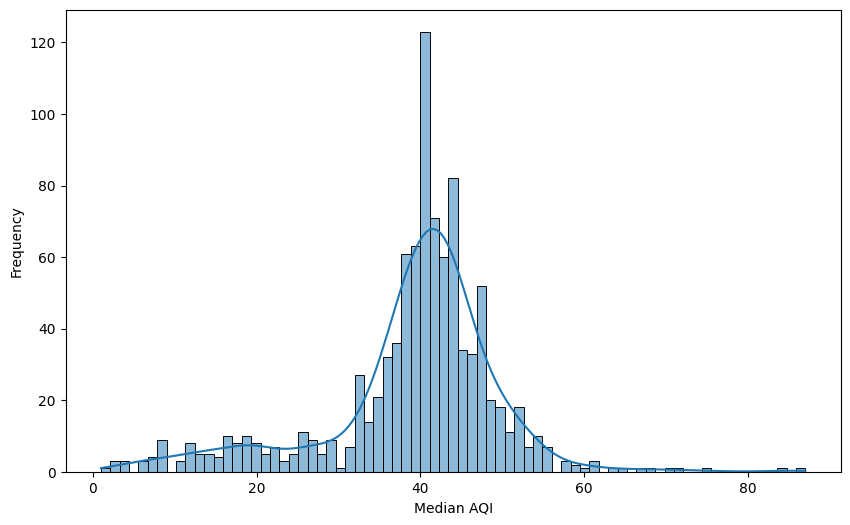

In [54]:
aqi_df[aqi_df['Year'] == 2024]['Median AQI']

plt.figure(figsize=(10, 6))
sns.histplot(aqi_df[aqi_df['Year'] == 2024]['Median AQI'], bins=75, kde=True)
plt.xlabel('Median AQI')
plt.ylabel('Frequency')

<ipython-input-64-919ff774d748>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_states.head(10), x="Median AQI", y="State", palette="Reds_r")


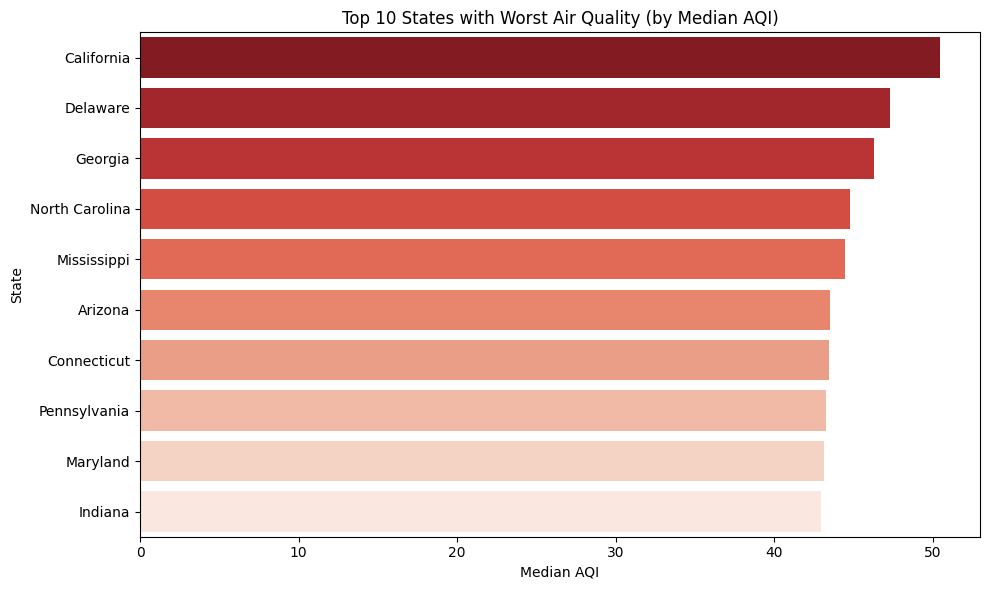

<ipython-input-64-919ff774d748>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_states.head(10), x="Median AQI", y="State", palette="Greens")


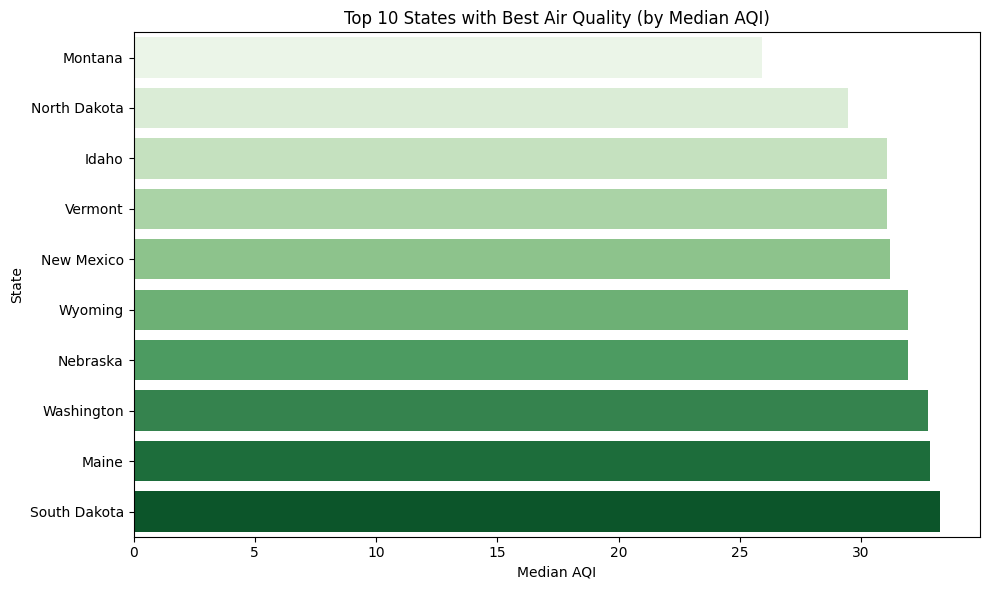

In [64]:
# Group by state and calculate average or median AQI values
state_aqi = aqi_df.groupby("State")[["Median AQI", "Max AQI"]].mean().reset_index()

# Sort states from best to worst (lowest to highest AQI)
best_states = state_aqi.sort_values(by="Median AQI", ascending=True)
worst_states = state_aqi.sort_values(by="Median AQI", ascending=False)

# Top 10 worst states
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_states.head(10), x="Median AQI", y="State", palette="Reds_r")
plt.title("Top 10 States with Worst Air Quality (by Median AQI)")
plt.xlabel("Median AQI")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Top 10 best states
plt.figure(figsize=(10, 6))
sns.barplot(data=best_states.head(10), x="Median AQI", y="State", palette="Greens")
plt.title("Top 10 States with Best Air Quality (by Median AQI)")
plt.xlabel("Median AQI")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [ ]:
## - getting a row with hazardous days and a smaller value of days with AQI to serve as example in the README.md
# aqi_df[((aqi_df['Hazardous Days'] + 100) >= aqi_df['Days with AQI']) & (aqi_df['Hazardous Days'] >= 1)]

| **Column**                              | **Description**                                                                                                                                                                                    |
| --------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Days with AQI**                       | Total number of days in the year for which the Air Quality Index (AQI) was calculated.                                                                                                             |
| **Good Days**                           | Number of days the AQI was in the "Good" range (0–50), meaning air quality was satisfactory with little or no risk.                                                                                |
| **Moderate Days**                       | Number of days the AQI was in the "Moderate" range (51–100), which may pose a minor risk to a very small number of sensitive individuals.                                                          |
| **Unhealthy for Sensitive Groups Days** | Days when AQI was in the 101–150 range, where sensitive individuals (e.g., elderly, children, those with asthma) may experience health effects, but the general public is unlikely to be affected. |
| **Unhealthy Days**                      | Days with AQI in the 151–200 range. Everyone may begin to experience health effects, and members of sensitive groups may experience more serious effects.                                          |
| **Very Unhealthy Days**                 | Days with AQI between 201–300. Health alert: everyone may experience more serious health effects.                                                                                                  |
| **Hazardous Days**                      | Days with AQI above 300. Health warnings of emergency conditions: the entire population is more likely to be affected.                                                                             |
| **Max AQI**                             | The highest (worst) AQI value recorded for the county during the year.                                                                                                                             |
| **90th Percentile AQI**                 | The AQI value below which 90% of the daily AQI values fall. This gives an idea of how bad AQI gets on the worse days, without considering extremes.                                                |
| **Median AQI**                          | The middle AQI value for the year—half of the AQI values were above this, and half were below.                                                                                                     |
| **Days CO**                             | Number of days where carbon monoxide (CO) was the primary pollutant determining the AQI.                                                                                                           |
| **Days NO2**                            | Number of days where nitrogen dioxide (NO₂) was the primary pollutant determining the AQI.                                                                                                         |
| **Days Ozone**                          | Number of days where ground-level ozone was the dominant pollutant affecting the AQI.                                                                                                              |
| **Days PM2.5**                          | Number of days where fine particulate matter (PM2.5) was the primary pollutant.                                                                                                                    |
| **Days PM10**                           | Number of days where coarse particulate matter (PM10) was the primary pollutant.                                                                                                                   |


# Analyzing the data

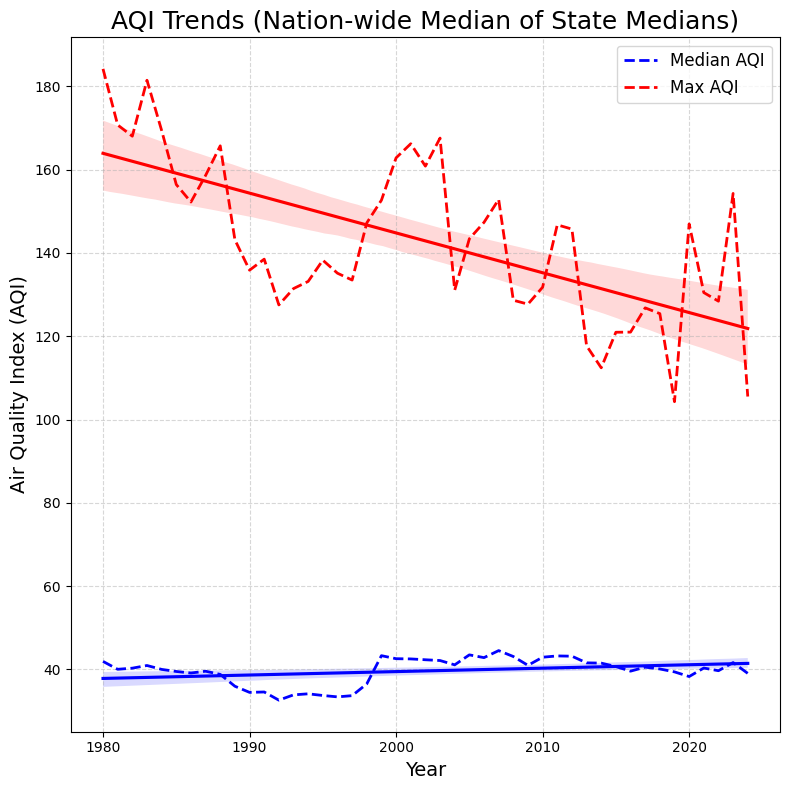

In [62]:
USAQI_mean_byyears = aqi_df.groupby('Year').mean(numeric_only=True).reset_index()


# Reshape the data
df_melted = USAQI_mean_byyears.melt(id_vars='Year', value_vars=['Median AQI', 'Max AQI'],
                                     var_name='Type', value_name='AQI')

plt.figure(figsize=(8, 8))

# Median AQI
subset_median = df_melted[df_melted['Type'] == 'Median AQI']
sns.regplot(data=subset_median, x='Year', y='AQI', scatter=False, color='blue',
            line_kws={'label': 'Trend (Median AQI)'})
plt.plot(subset_median['Year'], subset_median['AQI'], color='blue', label='Median AQI', linewidth=2, linestyle='--')

# Max AQI
subset_max = df_melted[df_melted['Type'] == 'Max AQI']
sns.regplot(data=subset_max, x='Year', y='AQI', scatter=False, color='red',
            line_kws={'label': 'Trend (Max AQI)'})
plt.plot(subset_max['Year'], subset_max['AQI'], color='red', label='Max AQI', linewidth=2, linestyle='--')

# Title and labels
plt.title('AQI Trends (Nation-wide Median of State Medians)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Air Quality Index (AQI)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Define URLs and paths
url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip'
zip_path = '/content/USshape_zipped/cb_2021_us_state_20m.zip'
extract_path = '/content/USshape_extracted/'
shapefile_path = os.path.join(extract_path, 'cb_2021_us_state_20m.shp')

# Check if shapefile already exists
if not os.path.exists(shapefile_path):
    print("Shapefile not found — downloading and extracting...")

    # Create directories if they don't exist
    os.makedirs(os.path.dirname(zip_path), exist_ok=True)
    os.makedirs(extract_path, exist_ok=True)

    # Disable SSL warnings and download ZIP file
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    response = requests.get(url, verify=False)
    with open(zip_path, 'wb') as f:
        f.write(response.content)

    # Extract contents
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("Download and extraction complete.")
else:
    print("Shapefile already exists — skipping download.")

# Load shapefile
states = gpd.read_file(shapefile_path)

Shapefile not found — downloading and extracting...
Download and extraction complete.


In [ ]:
# Data prep
year2024 = aqi_df[aqi_df['Year'] == 2024]
year2024_avg_state = year2024.groupby('State')['Median AQI'].mean().reset_index()

# Drop unwanted regions (e.g., Puerto Rico, DC)
states = states[~states['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia'])]

# Map full state names to abbreviations
state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

year2024_avg_state['State Abbrev'] = year2024_avg_state['State'].map(state_to_abbrev)

states['State Abbrev'] = states['NAME'].map(state_to_abbrev)

# Merge the GeoDataFrame with AQI data
aqi_map = states.merge(year2024_avg_state, on='State Abbrev')

# Optional: project to a projected CRS for better centroid placement
aqi_map = aqi_map.to_crs(epsg=2163)

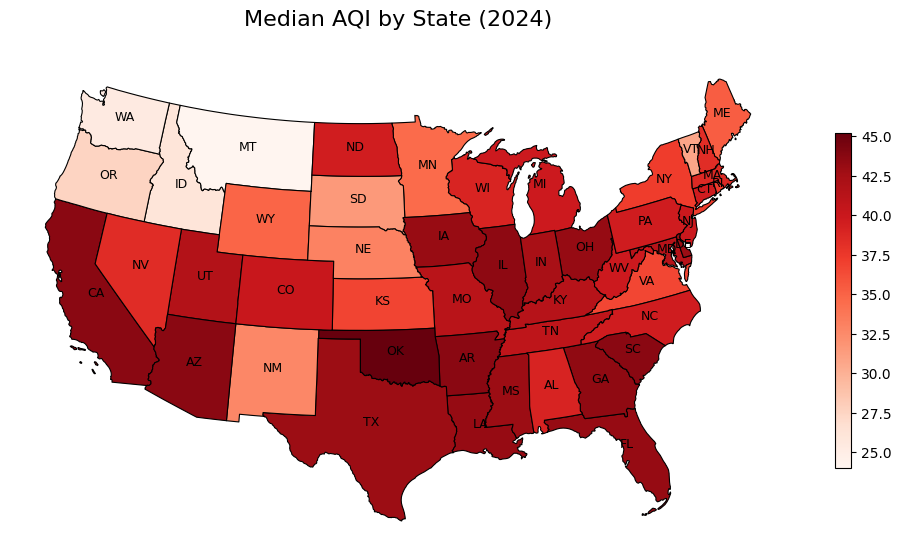

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Choropleth colored by Median AQI
aqi_map.plot(
    column='Median AQI',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0',
    legend=True,
    legend_kwds={'label': "", 'shrink': 0.5}
)

# Add state abbreviation labels on centroids
for idx, row in aqi_map.iterrows():
    plt.annotate(
        text=row['State Abbrev'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=9,
        color='black'
    )

ax.set_title("Median AQI by State (2024)\n", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

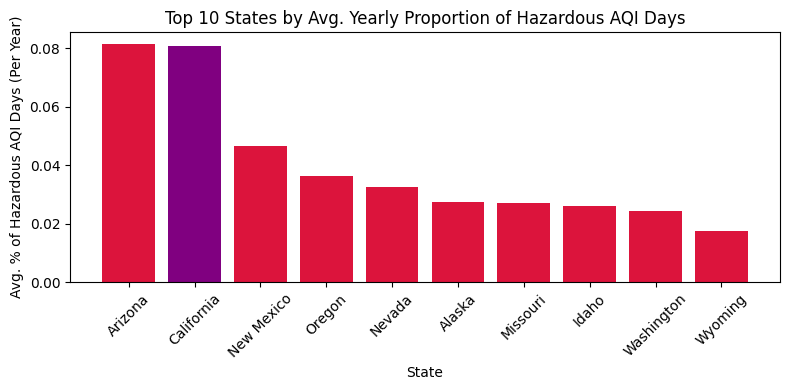

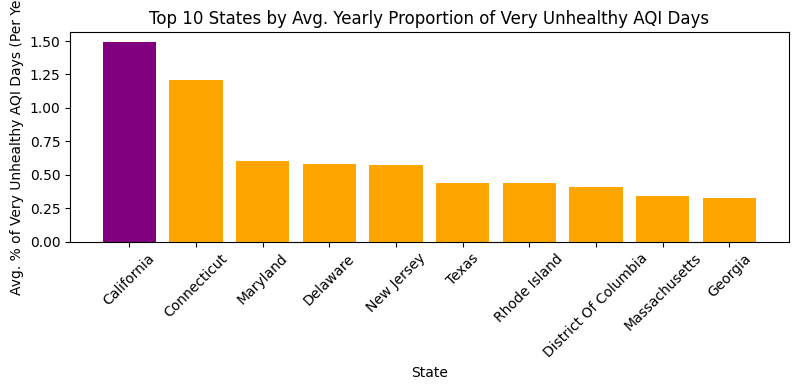

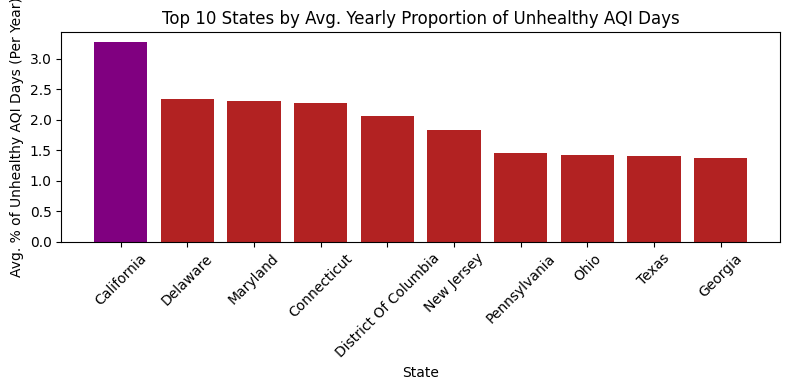

In [ ]:
# Group by State and Year, calculate per-year proportions
yearly = aqi_df.groupby(['State', 'Year']).apply(
    lambda x: pd.Series({
        'Yearly Good Proportion': x['Good Days'].sum() / x['Days with AQI'].sum(),
        'Yearly Moderate Proportion': x['Moderate Days'].sum() / x['Days with AQI'].sum(),
        'Yearly Unhealthy for Sensitive Groups Proportion': x['Unhealthy for Sensitive Groups Days'].sum() / x['Days with AQI'].sum(),
        'Yearly Unhealthy Proportion': x['Unhealthy Days'].sum() / x['Days with AQI'].sum(),
        'Yearly Very Unhealthy Proportion': x['Very Unhealthy Days'].sum() / x['Days with AQI'].sum(),
        'Yearly Hazardous Proportion': x['Hazardous Days'].sum() / x['Days with AQI'].sum(),
        'Total Days with AQI': x['Days with AQI'].sum()  # Optional, useful for reference
    }),
    include_groups=False
).reset_index()

# Average across years per state
state_avg = yearly.groupby('State').mean().reset_index()

# Plot top 10 states by average yearly hazardous proportion
top10_hazardous = state_avg.sort_values(by='Yearly Hazardous Proportion', ascending=False).head(10)

plt.figure(figsize=(8, 4))
colors = ['purple' if state == 'California' else 'crimson' for state in top10_hazardous['State']]
plt.bar(top10_hazardous['State'], top10_hazardous['Yearly Hazardous Proportion'] * 100, color=colors)
plt.xlabel('State')
plt.ylabel('Avg. % of Hazardous AQI Days (Per Year)')
plt.title('Top 10 States by Avg. Yearly Proportion of Hazardous AQI Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top 10 states by average yearly Very Unhealthy proportion
top10_unhealthy = state_avg.sort_values(by='Yearly Very Unhealthy Proportion', ascending=False).head(10)

plt.figure(figsize=(8, 4))
colors = ['purple' if state == 'California' else 'orange' for state in top10_unhealthy['State']]
plt.bar(top10_unhealthy['State'], top10_unhealthy['Yearly Very Unhealthy Proportion'] * 100, color=colors)
plt.xlabel('State')
plt.ylabel('Avg. % of Very Unhealthy AQI Days (Per Year)')
plt.title('Top 10 States by Avg. Yearly Proportion of Very Unhealthy AQI Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top 10 states by average yearly Unhealthy proportion
top10_unhealthy = state_avg.sort_values(by='Yearly Unhealthy Proportion', ascending=False).head(10)

plt.figure(figsize=(8, 4))
colors = ['purple' if state == 'California' else 'firebrick' for state in top10_unhealthy['State']]
plt.bar(top10_unhealthy['State'], top10_unhealthy['Yearly Unhealthy Proportion'] * 100, color=colors)
plt.xlabel('State')
plt.ylabel('Avg. % of Unhealthy AQI Days (Per Year)')
plt.title('Top 10 States by Avg. Yearly Proportion of Unhealthy AQI Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped_year_state_df = yearly
avg_byyear_bystate = grouped_year_state_df.groupby('Year').mean(numeric_only=True).reset_index()
avg_byyear_bystate.head()

,Year,Yearly Good Proportion,Yearly Moderate Proportion,Yearly Unhealthy for Sensitive Groups Proportion,Yearly Unhealthy Proportion,Yearly Very Unhealthy Proportion,Yearly Hazardous Proportion,Total Days with AQI
0,1980,0.658314,0.234321,0.070180,0.026704,0.010472,0.000009,2774.693878
1,1981,0.694446,0.233929,0.050916,0.015505,0.005193,0.000012,2890.980000
2,1982,0.700887,0.232494,0.046594,0.014891,0.005111,0.000023,2929.740000
3,1983,0.680608,0.226848,0.057781,0.024872,0.009884,0.000006,2970.740000
4,1984,0.705202,0.223745,0.050610,0.015538,0.004906,0.000000,2871.529412


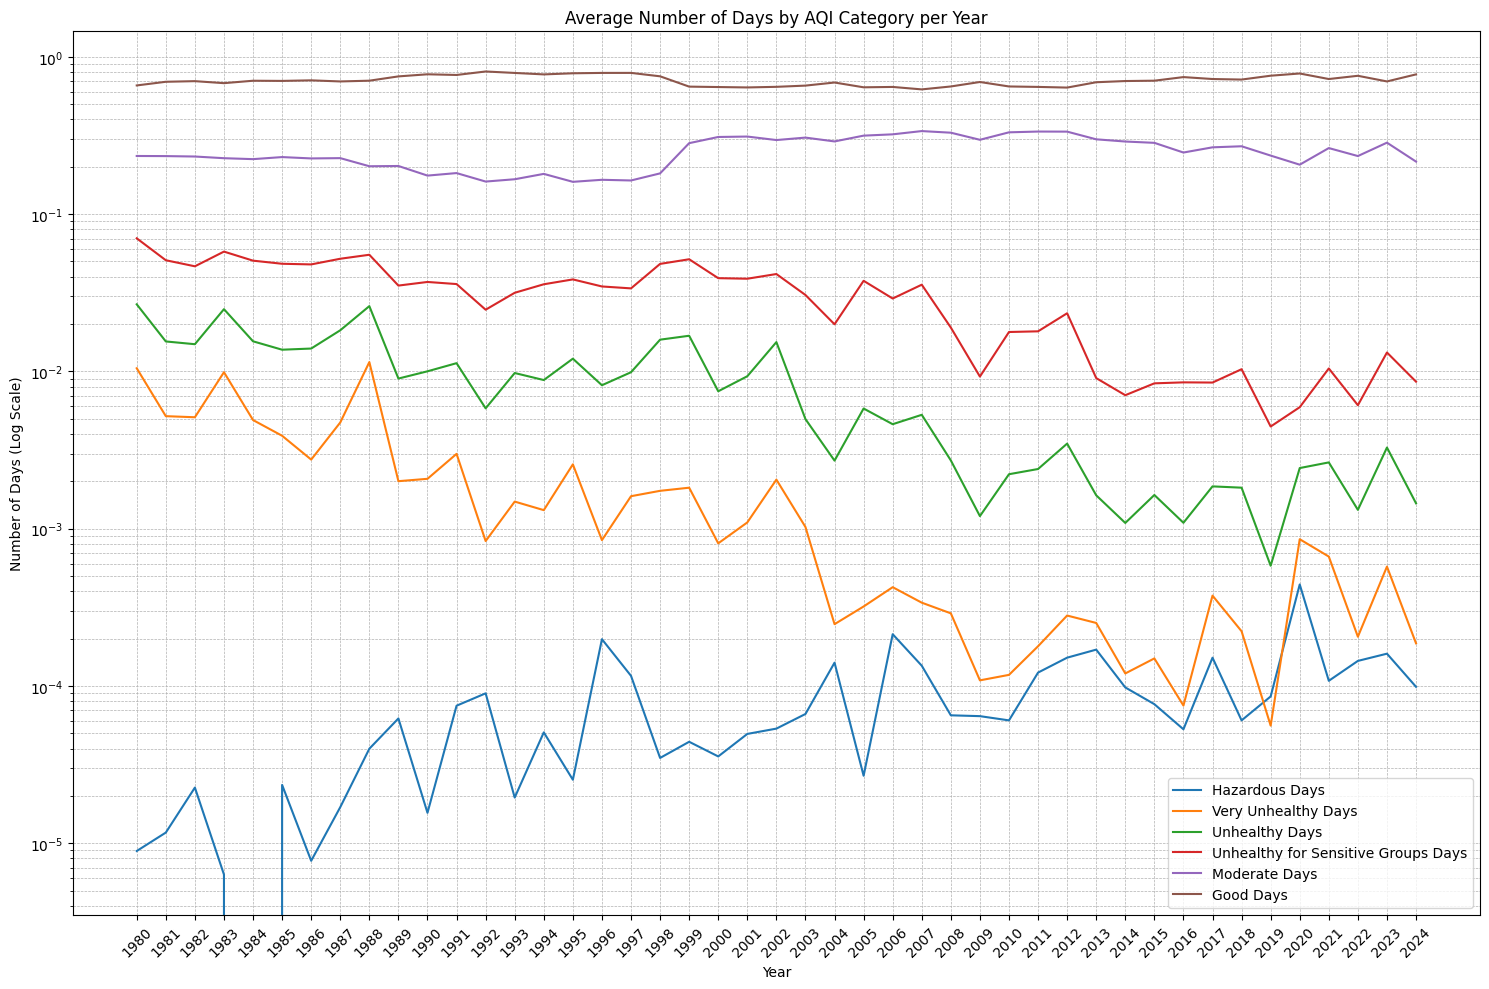

In [ ]:
# Create the plot
plt.figure(figsize=(15, 10))

plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Hazardous Proportion'], label='Hazardous Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Very Unhealthy Proportion'], label='Very Unhealthy Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Unhealthy Proportion'], label='Unhealthy Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Unhealthy for Sensitive Groups Proportion'], label='Unhealthy for Sensitive Groups Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Moderate Proportion'], label='Moderate Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Yearly Good Proportion'], label='Good Days')

plt.yscale('log')  # for better visualization
plt.xlabel('Year')
plt.ylabel('Number of Days (Log Scale)')
plt.title('Average Number of Days by AQI Category per Year')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(avg_byyear_bystate['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
aqi_df[aqi_df['Year'] == 1984].sort_values(by='Max AQI', ascending=False).head(5)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
30119,California,Los Angeles,1984,366,5,71,101,52,137,0,300,263,154,70,87,209,0,0
30127,California,Riverside,1984,366,52,116,40,52,106,0,300,243,110,29,105,232,0,0
30130,California,San Bernardino,1984,366,19,122,48,40,137,0,300,268,136,0,133,233,0,0
30449,Pennsylvania,Blair,1984,363,310,39,12,1,1,0,284,61,34,13,153,197,0,0
30471,Rhode Island,Kent,1984,300,198,51,24,15,12,0,281,143,42,0,0,300,0,0
